In [1]:
import pandas as pd
import math
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
from arch.unitroot import ADF
from statsmodels.tsa import arima_model

In [2]:
Unite = pd.read_csv('1216.csv', parse_dates=True, index_col='Date')

In [3]:
close = Unite.Close
UniteRet = Unite['ROI']
UniteRet = UniteRet.dropna()
UniteRet.head()

Date
2013-01-02    1.1257
2013-01-03    0.0000
2013-01-04    0.9276
2013-01-07   -1.1029
2013-01-08   -0.1859
Name: ROI, dtype: float64

Text(0.5, 1.0, '2013')

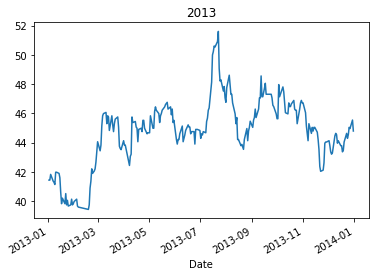

In [4]:
close.plot()
plt.title("2013")

Text(0.5, 1.0, '2013')

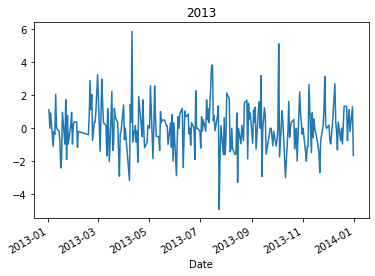

In [5]:
UniteRet.plot()
plt.title("2013")

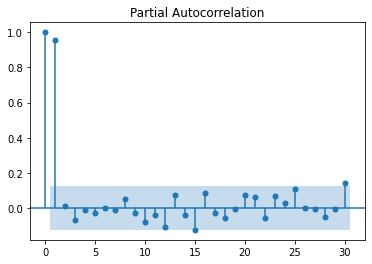

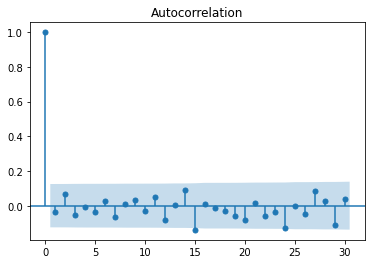

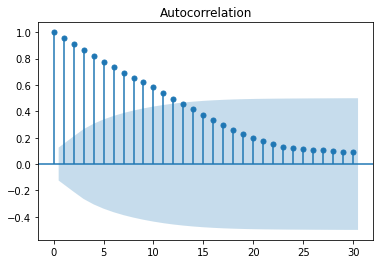

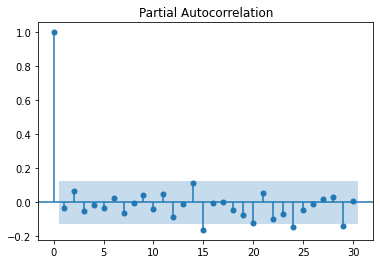

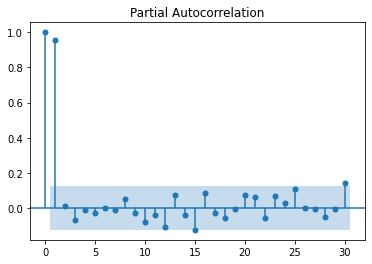

In [6]:
plot_acf(UniteRet,use_vlines=True,lags=30)
plot_acf(close,use_vlines=True,lags=30)
plot_pacf(UniteRet,use_vlines=True,lags=30)
plot_pacf(close,use_vlines=True,lags=30)

In [7]:
adf_UniteRet=ADF(UniteRet)
print(adf_UniteRet.summary().as_text())
adfclose=ADF(close)
print(adfclose.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -16.121
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.513
P-value                         0.112
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [8]:
LjungBox=stattools.q_stat(stattools.acf(UniteRet)[1:13],len(UniteRet))
LjungBox[1][-1] 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


0.8629656872606338

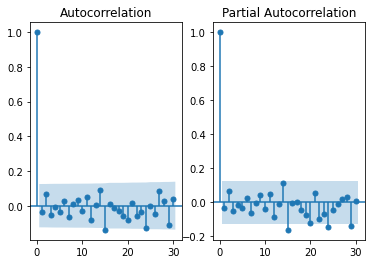

In [9]:
axe1=plt.subplot(121)
axe2=plt.subplot(122)

plot1=plot_acf(UniteRet,lags=30,ax=axe1)

plot2=plot_pacf(UniteRet,lags=30,ax=axe2)

In [10]:
model1=arima_model.ARIMA(UniteRet,order=(1,0,1)).fit()
model1.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarni

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    ROI   No. Observations:                  246
Model:                     ARMA(1, 1)   Log Likelihood                -433.971
Method:                       css-mle   S.D. of innovations              1.412
Date:                Fri, 14 May 2021   AIC                            875.942
Time:                        11:27:00   BIC                            889.963
Sample:                             0   HQIC                           881.588
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0461      0.087      0.527      0.598      -0.125       0.218
ar.L1.ROI     -0.7983      0.240     -3.320      0.001      -1.269      -0.327
ma.L1.ROI      0.7471      0.264      2.831      0.005       0.230       1.264
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2527           +0.0000j            1.2527            0.5000
MA.1           -1.3385           +0.0000j            1.3385            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
model2=arima_model.ARIMA(UniteRet,order=(1,0,2)).fit()
model2.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarni

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    ROI   No. Observations:                  246
Model:                     ARMA(1, 2)   Log Likelihood                -433.806
Method:                       css-mle   S.D. of innovations              1.411
Date:                Fri, 14 May 2021   AIC                            877.612
Time:                        11:27:00   BIC                            895.139
Sample:                             0   HQIC                           884.670
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0461      0.091      0.509      0.611      -0.132       0.224
ar.L1.ROI     -0.6909      0.395     -1.748      0.080      -1.466       0.084
ma.L1.ROI      0.6616      0.400      1.655      0.098      -0.122       1.445
ma.L2.ROI      0.0431      0.073      0.590      0.555      -0.100       0.186
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4473           +0.0000j            1.4473            0.5000
MA.1           -1.7000           +0.0000j            1.7000            0.5000
MA.2          -13.6392           +0.0000j           13.6392            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
model3=arima_model.ARIMA(UniteRet,order=(2,0,1)).fit()
model3.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarni

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    ROI   No. Observations:                  246
Model:                     ARMA(2, 1)   Log Likelihood                -433.803
Method:                       css-mle   S.D. of innovations              1.411
Date:                Fri, 14 May 2021   AIC                            877.606
Time:                        11:27:00   BIC                            895.133
Sample:                             0   HQIC                           884.663
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0461      0.091      0.507      0.612      -0.132       0.224
ar.L1.ROI     -0.6311      0.464     -1.359      0.174      -1.541       0.279
ar.L2.ROI      0.0469      0.078      0.598      0.550      -0.107       0.201
ma.L1.ROI      0.6022      0.462      1.302      0.193      -0.304       1.508
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4321           +0.0000j            1.4321            0.5000
AR.2           14.9008           +0.0000j           14.9008            0.0000
MA.1           -1.6606           +0.0000j            1.6606            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
model4=arima_model.ARIMA(UniteRet,order=(2,0,2)).fit()
model4.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarni

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    ROI   No. Observations:                  246
Model:                     ARMA(2, 2)   Log Likelihood                -433.803
Method:                       css-mle   S.D. of innovations              1.411
Date:                Fri, 14 May 2021   AIC                            879.605
Time:                        11:27:00   BIC                            900.637
Sample:                             0   HQIC                           888.074
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0461      0.091      0.506      0.613      -0.132       0.225
ar.L1.ROI     -0.6039      1.013     -0.596      0.551      -2.589       1.381
ar.L2.ROI      0.0700      0.781      0.090      0.929      -1.460       1.600
ma.L1.ROI      0.5749      1.014      0.567      0.571      -1.412       2.562
ma.L2.ROI     -0.0218      0.738     -0.030      0.976      -1.469       1.425
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4217           +0.0000j            1.4217            0.5000
AR.2           10.0545           +0.0000j           10.0545            0.0000
MA.1           -1.6374           +0.0000j            1.6374            0.5000
MA.2           27.9563           +0.0000j           27.9563            0.0000
-----------------------------------------------------------------------------
"""

In [14]:
model5=arima_model.ARIMA(UniteRet,order=(3,0,2)).fit()
model5.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarni

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    ROI   No. Observations:                  246
Model:                     ARMA(3, 2)   Log Likelihood                -430.254
Method:                       css-mle   S.D. of innovations              1.387
Date:                Fri, 14 May 2021   AIC                            874.508
Time:                        11:27:01   BIC                            899.046
Sample:                             0   HQIC                           884.388
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0453      0.088      0.517      0.605      -0.126       0.217
ar.L1.ROI     -1.6942      0.068    -24.965      0.000      -1.827      -1.561
ar.L2.ROI     -0.9745      0.115     -8.472      0.000      -1.200      -0.749
ar.L3.ROI     -0.0386      0.066     -0.587      0.557      -0.168       0.090
ma.L1.ROI      1.6950      0.028     60.349      0.000       1.640       1.750
ma.L2.ROI      0.9794      0.031     31.478      0.000       0.918       1.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9136           -0.5213j            1.0518           -0.4175
AR.2           -0.9136           +0.5213j            1.0518            0.4175
AR.3          -23.3927           -0.0000j           23.3927           -0.5000
MA.1           -0.8653           -0.5218j            1.0104           -0.4136
MA.2           -0.8653           +0.5218j            1.0104            0.4136
-----------------------------------------------------------------------------
"""

In [15]:
model3.conf_int()

,0,1
const,-0.132191,0.224443
ar.L1.ROI,-1.541225,0.278929
ar.L2.ROI,-0.106831,0.200552
ma.L1.ROI,-0.303994,1.508390


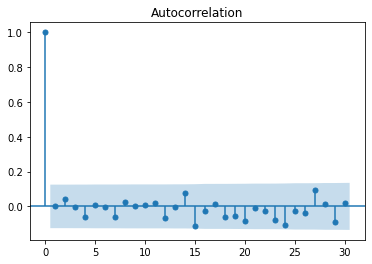

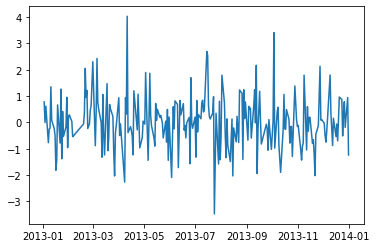

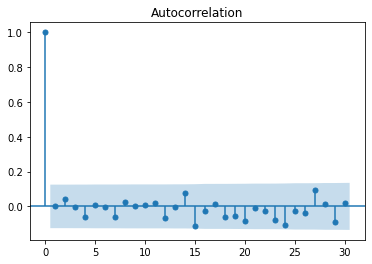

In [16]:
stdresid=model5.resid/math.sqrt(model5.sigma2)
plt.plot(stdresid)
plot_acf(stdresid,lags=30)

In [17]:
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:13],len(stdresid))
LjungBox[1][-1]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


0.9875331755128308

In [18]:
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:20],len(stdresid))
LjungBox[1][-1]

0.9304019635311558

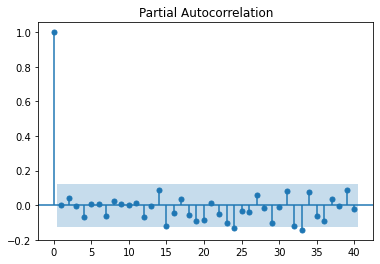

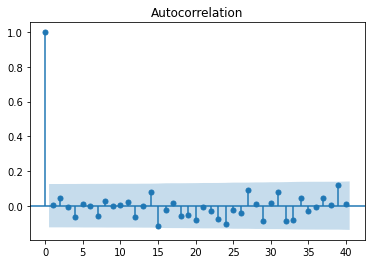

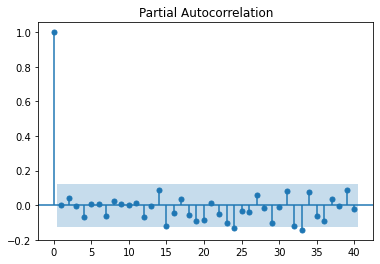

In [19]:
plot_acf(stdresid,lags=40)
plot_pacf(stdresid,lags=40)